<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/Copy_of_Sales_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_August_2019.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_December_2019.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv')
df10 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_November_2019.csv')
df11 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_October_2019.csv')
df12 = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_September_2019.csv')

In [ ]:
import pandas as pd

df_list = [df1,df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

# Initialize the merged DataFrame

print("df1",df1.shape)
merged_df = pd.DataFrame()
# Loop through the list of DataFrames and merge them one by one
for df in df_list:
  merged_df = pd.concat([merged_df, df], ignore_index=True)
# Print the merged DataFrame
merged_df

df1 (18383, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
df=merged_df

In [ ]:
df.shape

(186850, 6)

In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
df.duplicated().sum()

1162

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df = df[df['Quantity Ordered'].str.isnumeric()]
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

<ipython-input-44-fde093192bae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce').astype(float)

<ipython-input-46-ef8d6c909634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce').astype(float)


In [ ]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [ ]:
df['Purchase Address']=df['Purchase Address'].str.split(',', expand=True)[1]

<ipython-input-48-04fa7f1c82f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase Address']=df['Purchase Address'].str.split(',', expand=True)[1]


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,Los Angeles


<Axes: xlabel='Product'>

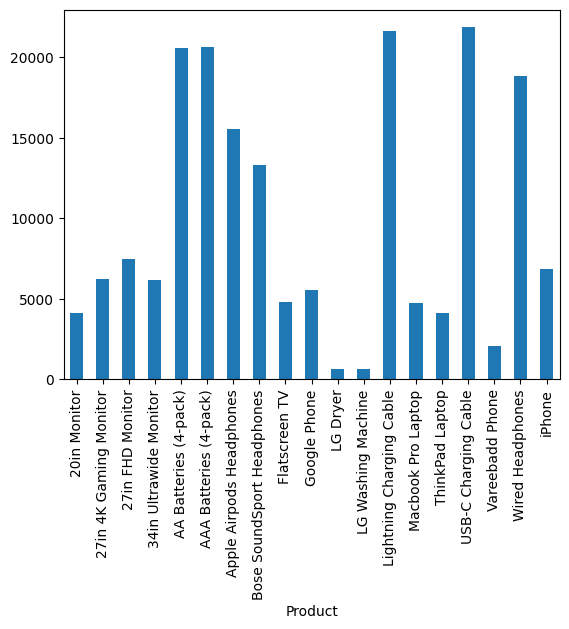

In [ ]:
# @title Number of orders per product

df.groupby('Product')['Order ID'].count().plot(kind='bar')

In [ ]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [ ]:
#print(df['Order Date'][1671])
df['Order Date'] = pd.to_datetime(df['Order Date'],infer_datetime_format=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.head()

<ipython-input-52-be25403a6645>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'],infer_datetime_format=True)
<ipython-input-52-be25403a6645>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'],infer_datetime_format=True)
<ipython-input-52-be25403a6645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles


In [ ]:
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.dayofweek
df.head()

<ipython-input-53-373ce977ab92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].dt.month
<ipython-input-53-373ce977ab92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['Order Date'].dt.dayofweek


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas,4,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston,4,6
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles,4,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles,4,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles,4,1


**Model Training**

In [ ]:
X = df.drop(['Product','Order Date','Order ID'], axis=1)

y = df['Product']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000)

In [ ]:
X_train.shape

(129980, 5)

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
#li1 =OrdinalEncoder(categories = [X_train['Order ID'].unique()])
#li2 =OrdinalEncoder(categories = [X_test['Order ID'].unique()])
X_train['Purchase Address']=le.fit_transform(X_train['Purchase Address'])
X_test['Purchase Address']=le.fit_transform(X_test['Purchase Address'])
#X_train['Product'] = le.fit_transform(X_train['Product'])
#X_test['Product'] = le.fit_transform(X_test['Product'])
#X_train['Order ID'] = li1.fit_transform(X_train['Order ID'].values.reshape(-1,1))
#X_test['Order ID'] = li2.fit_transform(X_test['Order ID'].values.reshape(-1,1))

In [ ]:
X_train.head()

,Quantity Ordered,Price Each,Purchase Address,month,day
137395,1,999.99,6,11,2
129632,1,11.99,8,5,0
38349,1,99.99,5,12,4
170713,1,700.00,4,10,4
44932,1,1700.00,7,12,6


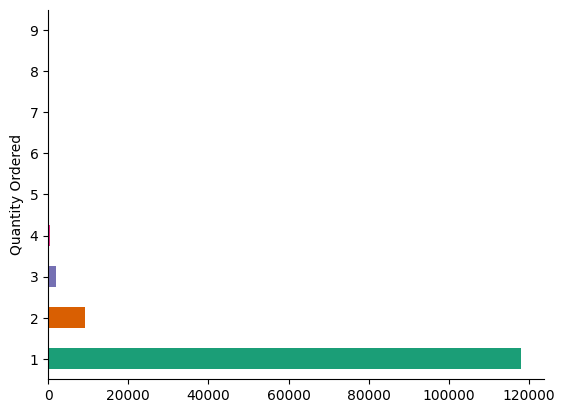

In [ ]:
# @title Quantity Ordered

from matplotlib import pyplot as plt
import seaborn as sns
X_train.groupby('Quantity Ordered').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['Wired Headphones', 'ThinkPad Laptop', 'Google Phone', ...,
       'iPhone', '27in FHD Monitor', 'Apple Airpods Headphones'],
      dtype=object)

In [ ]:
score = accuracy_score(y_test, y_pred)
score * 100

41.57541377948515